<b> Name: Aishwarya Bhavsar </b><br>
<b> CSULB ID: 029371509 </b><br>
<b>CECS 551 - Assignment 3 </b>

 <b> Implement multi-layer neural network WITHOUT using external deep learning libraries such as Keras, Caffe, Theano, TensorFlow, PyTorch </b>

<b>PART (a) </b><br>

(a) Consider a neural network as shown in Figure 1 that approximates XOR function. <br>
• The width of the layer 1 is 2, and the width of the layer 2 is 1.<br>
• The activation functions of the layer 1 are the hyperbolic tangent.<br>
• The activation function of the layer 2 is the sigmoid.<br>
• The loss function is the binary cross entropy <br>

<b>Import Numpy Library <b>

In [502]:
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt

<b> Hyperbolic Tangent Function - For Hidden Layer 1 </b>

In [503]:
#Implementation of activation function of the layer 1
#hyperbolic tangent function
def tanh(x):
    return (1.0 - np.exp(-2*x))/(1.0 + np.exp(-2*x))

def tanh_derivative(x):
    return (1 + x)*(1 - x)

<b> Sigmoid Function - For Hidden Layer 2 </b>

In [504]:
#Implementation of activation function of the layer 2
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sigmoid_derivative(z):
    return y * (1 - z)

<B>THE GRADIENT DESCENT METHOD TO OPTIMISE THE PARAMETERS</B>

In [505]:
#Implementation of gradient descent method
def gradient_descent(
    gradient, start, learn_rate, n_iter=50, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector


In [506]:
# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0

def initializeParameters(modelinput, total_neurons, modeloutput):
    W = np.random.randn(total_neurons, modelinput)
    w = np.random.randn(modeloutput, total_neurons)
    b1 = np.zeros((total_neurons, 1))
    b2 = np.zeros((modeloutput, 1))
    
    parameters = {"W" : W, "b1": b1,
                    "w" : w, "b2": b2}
    return parameters

<b>Part (c)</b> <br>
Implement the model without using any deep learning libraries. However, you can use import numpy in case you need.<br>
X = np.array([[0,0],[0,1],[1,0],[1,1]]) <br>
y = np.array([0,1,1,0])<br>
You need to optimize the parameters using simple gradient descent method. <br>
Predict ˆy using the trained network and show the result. 


<b> Forward Propagation </b>- The input data is fed in the forward direction through the network.<br> Each hidden layer accepts the input data, processes it as per the activation function and passes to the successive layer.

In [507]:
# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W = parameters["W"]
    w = parameters["w"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    Z1 = np.dot(W, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(w, A1) + b2
    A2 = sigmoid(Z2)

    store = (Z1, A1, W, b1, Z2, A2, w, b2)
    loss_log = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost_function = -np.sum(loss_log) / m    
    return cost_function, store, A2


<b> Backward Propagation </b> - Fine-tuning the weights of a neural net based on the error rate (i.e., loss) obtained in the previous epoch (i.e., iteration). <br> Proper tuning of the weights ensures lower error rates, making the model reliable by increasing its generalization. 

<b>Mini-Batches</b>
The network is designed to process examples in mini-batches.<br>
The gradients are calculated for more than one example at a time. <br>
The sum is squashing the results down to a single update.

In [508]:
# Backward Propagation
def backwardPropagation(X, Y, store):
    m = X.shape[1]
    (Z1, A1, W, b1, Z2, A2, w, b2) = store

    dZ2 = A2 - Y
    dw = np.dot(dZ2, A1.T) / m
    #matrix multiplication of the local and the upstream derivatives
    db2 = np.sum(dZ2, axis = 1, keepdims = True)  #dimensions of the array matrix gets saved.

    dA1 = np.dot(w.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
        
    gradients = {"dZ2": dZ2, "dw": dw, "db2": db2,
                "dZ1": dZ1, "dW": dW, "db1": db1}
    return gradients

<b>Updation Of Weights </b>: Weights associated with neuron connections must be updated after forward passes of data through the network. <br> These weights are adjusted to help reconcile the differences between the actual and predicted outcomes for subsequent forward passes.

In [509]:
# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W"] = parameters["W"] - learningRate * gradients["dW"]
    parameters["w"] = parameters["w"] - learningRate * gradients["dw"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters


<b> XOR Inputs </b>

In [510]:
# Model to learn the XOR truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
Y = np.array([[0, 1, 1, 0]])               # XOR output


$$Learning Rate (\eta) $$

As mentioned in the question, if there is only time to optimize one hyper-parameter and one uses stochastic gradient descent, then this is the hyper-parameter (learning rate) that is worth tuning.<br>
A default good learning rate is 0.1 or 0.01 based on trial and error method.


In [511]:
# Define model parameters
total_neurons = 3 # number of hidden layer neurons (2)
modelinput = X.shape[0] # number of input features (2)
modeloutput = Y.shape[0] # number of output features (1)
parameters = initializeParameters(modelinput, total_neurons, modeloutput)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], store, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, store)
    parameters = updateParameters(parameters, gradients, learningRate)

<b>Performance Evaluation</b>

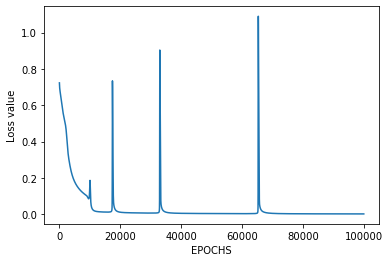

In [512]:
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("LOSS VALUE")
plt.show()

<b>Test - Predict y(hat) using the trained network</b>

In [513]:
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input
cost,_, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0

<b> Output Results</b>

In [514]:
# print(A2)
print(prediction)


[[1. 0. 0. 1.]]


<b>PART (b) </b><br>
Calculate derivates. Please include the answers in the Jupyter notebook.<br>
Notice that you can use LATEX equation in the Jupyter notebook.

<b>Simple Gradient Descent For Backpropagation</b> <br>
All the weight parameters of the model for both the layers - Layer 1 & Layer 2<br>

<b>Layer 2 Parameters:<b>

$$ \frac{{\partial L}}{{\partial w _{11}^{(2)}}} = \left( {\frac{{\partial L}}{{\partial {\rm{ŷ}} _1^{}}}} \right)\left( {\frac{{\partial {\rm{ŷ}} _1^{}}}{{\partial h _1^{(2)}}}} \right)\left( {\frac{{\partial h _1^{(2)}}}{{\partial  a_{1}^{(2)}}}} \right) \left({\frac{{\partial  a_{1}^{(2)}}}{{\partial w _{11}^{(2)}}}}\right)$$

$$  =  {{{(ŷ _1 - y _1)(h _1^{(2)}) (1 - h _1^{(2)})(h _1^{(1)}) }}} $$
$$  =  {{{(ŷ _1 - y _1)(ŷ _1) (1 - ŷ _1)(h _1^{(1)}) }}} $$


$$ \frac{{\partial L}}{{\partial w _{21}^{(2)}}} = \left( {\frac{{\partial L}}{{\partial {\rm{ŷ}} _1^{}}}} \right)\left( {\frac{{\partial {\rm{ŷ}} _1^{}}}{{\partial h _1^{(2)}}}} \right)\left( {\frac{{\partial h _1^{(2)}}}{{\partial  a_{1}^{(2)}}}} \right) \left({\frac{{\partial  a_{1}^{(2)}}}{{\partial w _{21}^{(2)}}}}\right)$$

$$  =  {{{(ŷ _1 - y _1)(h _1^{(2)}) (1 - h _1^{(2)})(h _1^{(1)}) }}} $$
$$  =  {{{(ŷ _1 - y _1)(ŷ _1) (1 - ŷ _1)(h _1^{(1)}) }}} $$

<b>Optimisation Of Layer 2 Parameters :<b> <br>
$$\eta = 0.01$$

$$w _{11}^{(2)} \leftarrow w _{11}^{(2)} - \eta \frac{{\partial L}}{{\partial w _{11}^{(2)}}}$$ <br>
$$w _{21}^{(2)} \leftarrow w _{21}^{(2)} - \eta \frac{{\partial L}}{{\partial w _{21}^{(2)}}}$$


<b>Layer 1 Parameters:<b>

$$ \frac{{\partial L}}{{\partial w _{11}^{(1)}}} = \left( {\frac{{\partial L}}{{\partial {\rm{h}} _1^{(1)}}}} \right)\left( {\frac{{\partial {\rm{h}} _1^{(1)}}}{{\partial a _1^{(1)}}}} \right)\left( {\frac{{\partial a _1^{(1)}}}{{\partial  w_{11}^{(1)}}}} \right)$$

$$={{{((ŷ _1 - y _1)ŷ _1(1 - ŷ _1)w _{11}^{(2)}) h _1^{(1)} (1 - h _1^{(1)})x _1 }}} $$ <br>

$$ \frac{{\partial L}}{{\partial w _{12}^{(1)}}} = \left( {\frac{{\partial L}}{{\partial {\rm{h}} _2^{(1)}}}} \right)\left( {\frac{{\partial {\rm{h}} _2^{(1)}}}{{\partial a _2^{(1)}}}} \right)\left( {\frac{{\partial a _2^{(1)}}}{{\partial  w_{12}^{(1)}}}} \right)$$

$$={{{((ŷ _1 - y _1)ŷ _1(1 - ŷ _1)w _{21}^{(2)}) h _2^{(1)} (1 - h _2^{(1)})x _1 }}} $$ <br>

$$ \frac{{\partial L}}{{\partial w _{21}^{(1)}}} = \left( {\frac{{\partial L}}{{\partial {\rm{h}} _1^{(1)}}}} \right)\left( {\frac{{\partial {\rm{h}} _1^{(1)}}}{{\partial a _1^{(1)}}}} \right)\left( {\frac{{\partial a _1^{(1)}}}{{\partial  w_{21}^{(1)}}}} \right)$$

$$={{{((ŷ _1 - y _1)ŷ _1(1 - ŷ _1)w _{11}^{(2)}) h _1^{(1)} (1 - h _1^{(1)})x _2 }}} $$ <br>

$$ \frac{{\partial L}}{{\partial w _{22}^{(1)}}} = \left( {\frac{{\partial L}}{{\partial {\rm{h}} _2^{(1)}}}} \right)\left( {\frac{{\partial {\rm{h}} _2^{(1)}}}{{\partial a _2^{(1)}}}} \right)\left( {\frac{{\partial a _2^{(1)}}}{{\partial  w_{22}^{(1)}}}} \right)$$

$$={{{((ŷ _1 - y _1)ŷ _1(1 - ŷ _1)w _{21}^{(2)}) h _2^{(1)} (1 - h _2^{(1)})x _2 }}} $$ <br>

<b>Optimisation Of Layer 1 Parameters :<b> <br>
$$\eta = 0.01$$

$$w _{11}^{(1)} \leftarrow w _{11}^{(1)} - \eta \frac{{\partial L}}{{\partial w _{11}^{(1)}}}$$ <br>
$$w _{11}^{(2)} \leftarrow w _{11}^{(2)} - \eta \frac{{\partial L}}{{\partial w _{11}^{(2)}}}$$ <br>
$$w _{21}^{(1)} \leftarrow w _{21}^{(1)} - \eta \frac{{\partial L}}{{\partial w _{21}^{(1)}}}$$ <br>
$$w _{22}^{(1)} \leftarrow w _{22}^{(1)} - \eta \frac{{\partial L}}{{\partial w _{22}^{(1)}}}$$ <br>


<b>Bias Parameters Of The Model:<b>

$$ \frac{{\partial L}}{{\partial b _{}^{(2)}}} = \left( {\frac{{\partial L}}{{\partial {\rm{ŷ}} _1^{}}}} \right)\left( {\frac{{\partial {\rm{ŷ}} _1^{}}}{{\partial h _1^{(2)}}}} \right)\left( {\frac{{\partial h _1^{(2)}}}{{\partial  a_{1}^{(2)}}}} \right) \left({\frac{{\partial  a_{1}^{(2)}}}{{\partial b _{}^{(2)}}}}\right)$$

$$ \frac{{\partial L}}{{\partial b _{1}^{(1)}}} = \left( {\frac{{\partial L}}{{\partial {\rm{h}} _1^{(1)}}}} \right)\left( {\frac{{\partial {\rm{h}} _1^{(1)}}}{{\partial a _1^{(1)}}}} \right)\left( {\frac{{\partial a _1^{(1)}}}{{\partial  b_{1}^{(1)}}}} \right)$$

$$ \frac{{\partial L}}{{\partial b _{2}^{(1)}}} = \left( {\frac{{\partial L}}{{\partial {\rm{h}} _2^{(1)}}}} \right)\left( {\frac{{\partial {\rm{h}} _2^{(1)}}}{{\partial a _2^{(1)}}}} \right)\left( {\frac{{\partial a _2^{(1)}}}{{\partial  b_{2}^{(1)}}}} \right)$$

<b>Optimisation Of Bias Parameters equals to 1:<b> <br>
$$\eta = 0.01$$

$$b _{}^{(2)} \leftarrow b _{}^{(2)} - \eta \frac{{\partial L}}{{\partial b _{}^{(2)}}}$$ <br>
$$b _{1}^{(1)} \leftarrow b _{1}^{(1)} - \eta \frac{{\partial L}}{{\partial b _{1}^{(2)}}}$$ <br>
$$b _{2}^{(1)} \leftarrow b _{2}^{(1)} - \eta \frac{{\partial L}}{{\partial b _{2}^{(1)}}}$$ <br>



<b> Solution to XOR Problem - A Linear Model</b>

$$\frac{{\partial L}}{{\partial \overrightarrow W _{}^{(1)}}}=\begin{bmatrix} \frac{{\partial L}}{{\partial w _{11}^{(1)}}} &  \frac{{\partial L}}{{\partial w _{12}^{(1)}}} \\ \frac{{\partial L}}{{\partial w _{21}^{(1)}}} &  \frac{{\partial L}}{{\partial w _{22}^{(1)}}} \end{bmatrix} $$
$$=\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}$$

$$ f(\overrightarrow x;\overrightarrow W,\overrightarrow b _{}^{(1)},\overrightarrow w,\overrightarrow b _{}^{(2)})=\overrightarrow w _{}^{(T)}\overrightarrow h + \overrightarrow b _{}^{(2)}$$

$$=\overrightarrow w _{}^{(T)}g(\overrightarrow W _{}^{(T)}\overrightarrow x \overrightarrow b _{}^{(2)}+ \overrightarrow b _{}^{(1)}) + \overrightarrow b _{}^{(2)}$$

$$=\overrightarrow W _{}^{(T)}max(0, \overrightarrow W _{}^{(T)}\overrightarrow x + \overrightarrow b _{}^{(1)}) + \overrightarrow b _{}^{(2)}$$

$$\overrightarrow W _{}^{(T)}=\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} $$ <br>
$$\overrightarrow b _{}^{(1)}=\begin{bmatrix} 0 \\ -1 \end{bmatrix} $$ <br>
$$\overrightarrow w _{}^{}=\begin{bmatrix} 1 \\ -2 \end{bmatrix} $$ <br>
$$b = 0$$<br>

$$\overrightarrow X _{}^{(T)}=\begin{bmatrix} 0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix} $$ <br>
$$\overrightarrow X _{}^{(T)}\overrightarrow W _{}^{(T)}=\begin{bmatrix} 0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} $$ <br>
$$=\begin{bmatrix} 0 & 0 \\ 1 & 1 \\ 1 & 1 \\ 2 & 2 \end{bmatrix}$$



<b>Broadcasting</b><br>
The term broadcasting refers to how numpy treats arrays with different Dimension during arithmetic operations which lead to certain constraints, the smaller array is broadcast across the larger array so that they have compatible shapes. 

$$\overrightarrow W _{}^{(T)}\overrightarrow x _{}^{} + \overrightarrow b _{}^{(1)} = \overrightarrow W _{}^{(}\overrightarrow x _{}^{} + \overrightarrow b _{}^{(1)}$$ <br>

$$=\begin{bmatrix} 0 & 0 \\ 1 & 1 \\ 1 & 1 \\ 2 & 2 \end{bmatrix} + \begin{bmatrix} 0 & -1 \\ 0 & -1 \\ 0 & -1 \\ 0 & -1 \end{bmatrix}$$

$$=\begin{bmatrix} 0 & -1 \\ 1 & 0 \\ 1 & 0 \\ 2 & 1 \end{bmatrix}$$

$$max(0, \overrightarrow W _{}^{}\overrightarrow x + \overrightarrow X _{}^{}) + \overrightarrow b _{}^{(1)}$$ <br>
$$=\begin{bmatrix} 0 & 0 \\ 1 & 0 \\ 1 & 0 \\ 2 & 1 \end{bmatrix}$$ <br>

$$max(0, \overrightarrow W _{}^{}\overrightarrow X + \overrightarrow b _{}^{(1)})\overrightarrow w + \overrightarrow b _{}^{(2)}$$ <br>

$$=\begin{bmatrix} 0 & 0 \\ 1 & 0 \\ 1 & 0 \\ 2 & 1 \end{bmatrix}\begin{bmatrix} 1 \\ -2 \end{bmatrix} + 0 $$ <br>
$$=\begin{bmatrix} 0 \\ 1 \\ 1 \\ 0 \end{bmatrix}$$